In [17]:
import glob, os, sys, util
table_fnames = glob.glob('t2k/data/v2/tables/*.csv')

tablerow_content = {}
table_row_keys = {}
name_table = {}
for fname in table_fnames:
    name = os.path.basename(fname)
    print(f'Reading table {name:>80s}', end='\r', file=sys.stderr)
    webtable = util.WebTable.from_csv(fname)
    name_table[name]= webtable

Got 779 tables in total
674 tables have a key column
235 tables have a class


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb90de13048>,
      dtype=object)

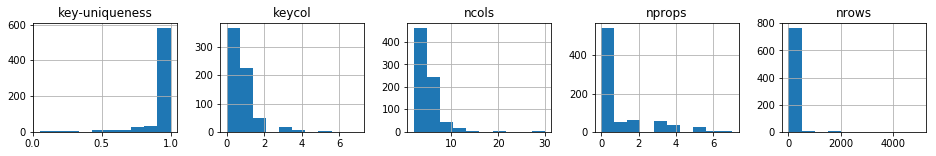

In [72]:
%matplotlib inline
import pandas as pd
pd.set_option('max_colwidth', -1)
pd.set_option('max_rows', 1000)
tablestats = pd.DataFrame(
    [(name, len(table.rows), len(table.cols), table.keycol, 
      table.col_uniqueness[table.keycol] if table.keycol != None else float('nan'))
     for name, table in name_table.items()],
    columns = ['name', 'nrows', 'ncols', 'keycol', 'key-uniqueness']
)

gs_class = pd.read_csv('t2k/data/v2/gs_class.csv', names=['name', 'class'], usecols=[0,1])
tablestats = tablestats.merge(gs_class, on='name', how='outer')
tablestats['class'].fillna('', inplace=True)

gs_property = pd.read_csv('t2k/data/v2/gs_property.csv', names=['colname', 'prop'], usecols=[0,1])
gs_property['name'] = gs_property['colname'].map(lambda n: n.split('~')[0])
nprops = gs_property.groupby('name')['colname'].agg('count').to_frame('nprops')
tablestats = tablestats.merge(nprops, on='name', how='outer')
tablestats['nprops'].fillna(0, inplace=True)


print(f'Got {len(tablestats)} tables in total')
print(f'{sum(~tablestats["keycol"].isna())} tables have a key column')
print(f'{sum(tablestats["class"] != "")} tables have a class')
      
tablestats.hist(layout=(1,5), figsize=(16,2))

In [83]:
name = 'CC-MAIN-20150728002301-00002-ip-10-236-191-2.ec2.internal_2312.csv'
name_table[name].print_colstats()
pd.read_csv(f't2k/data/v2/tables/{name}').head()

Max uniqueness = 1.0
0          Plot/Acting num:0 stdlen:6.00 uniq:1.00
1                      num:1 stdlen:0.00 uniq:0.33


,Plot/Acting,Unnamed: 1
0,Extras,NaN
1,Audio/Video Quality,NaN
2,Worth,$17.00


In [78]:
gs_property[gs_property['name'] == name]

,colname,prop,name


In [75]:
tablestats.sort_values('nprops', ascending=False)

,name,nrows,ncols,keycol,key-uniqueness,class,nprops
475,27466715_0_3913547177671701530.csv,387,8,0.0,1.000000,VideoGame,7.0
127,89511064_0_2199624509082573904.csv,232,10,2.0,1.000000,Country,7.0
276,22864497_0_8632623712684511496.csv,377,7,0.0,1.000000,VideoGame,7.0
638,68779923_2_1000046510804975562.csv,55,6,0.0,1.000000,Country,6.0
585,8468806_0_4382447409703007384.csv,110,7,1.0,1.000000,Lake,6.0
522,11688006_0_8123036130090004213.csv,193,7,1.0,1.000000,Country,6.0
753,78891639_0_3299957631631122948.csv,202,6,1.0,0.985149,City,5.0
150,93702496_0_39013305210829591.csv,30,6,1.0,1.000000,Company,5.0
257,29414811_13_8724394428539174350.csv,16,5,1.0,1.000000,VideoGame,5.0
247,48944826_0_2321751364268052533.csv,117,8,2.0,1.000000,VideoGame,5.0


In [93]:
tablestats[~tablestats['keycol'].isna() & (tablestats['class'] == '')]

,name,nrows,ncols,keycol,key-uniqueness,class,nprops
0,CC-MAIN-20150728002301-00002-ip-10-236-191-2.ec2.internal_6758.csv,6,2,0.0,1.000000,,0.0
1,CC-MAIN-20150728002309-00273-ip-10-236-191-2.ec2.internal_35073.csv,24,2,0.0,1.000000,,0.0
3,1438042989018_40_20150728002309-00165-ip-10-236-191-2_209545485_6.csv,7,4,1.0,1.000000,,0.0
5,CC-MAIN-20150728002309-00273-ip-10-236-191-2.ec2.internal_39891.csv,11,2,0.0,1.000000,,0.0
7,CC-MAIN-20150728002309-00273-ip-10-236-191-2.ec2.internal_39626.csv,8,2,0.0,1.000000,,0.0
10,1438042988310_3_20150728002308-00339-ip-10-236-191-2_871336952_0.csv,11,6,1.0,1.000000,,0.0
12,1438042989891_18_20150728002309-00210-ip-10-236-191-2_452792046_0.csv,30,2,1.0,1.000000,,0.0
13,CC-MAIN-20150728002301-00002-ip-10-236-191-2.ec2.internal_565.csv,2,4,0.0,1.000000,,0.0
18,CC-MAIN-20150728002301-00002-ip-10-236-191-2.ec2.internal_5964.csv,4,2,0.0,1.000000,,0.0
21,CC-MAIN-20150728002311-00090-ip-10-236-191-2.ec2.internal_53860.csv,10,5,1.0,1.000000,,0.0
